### 第七章 支持向量机

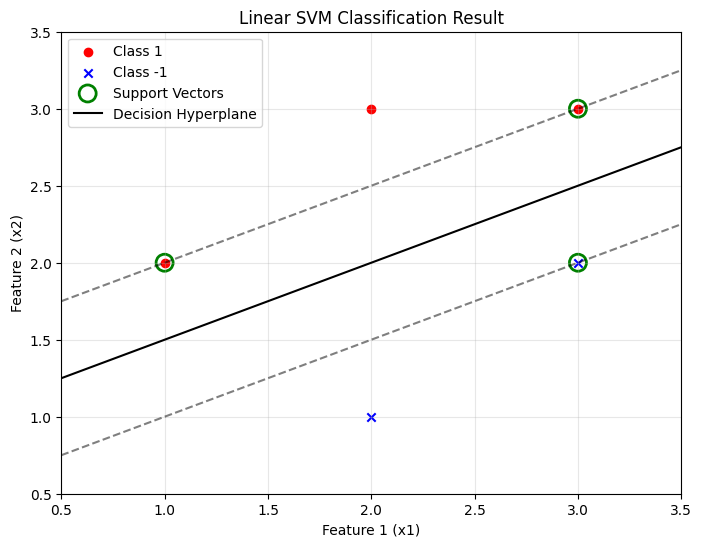

超平面参数：w = [-1.  2.] ，b = -2.0000000000000004
超平面方程：-1.00*x1 + 2.00*x2 + -2.00 = 0
支持向量：
 [[3. 2.]
 [1. 2.]
 [3. 3.]]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# 1. 准备数据（修正你输入的语法错误）
x = np.array([[1,2],[2,3],[3,3],[2,1],[3,2]])  # 特征数据
y = np.array([1,1,1,-1,-1])                    # 标签（1和-1分别代表两类）

# 2. 构建并训练线性SVM模型
# kernel='linear' 指定线性核，C设置为1（软间隔参数，这里数据线性可分，C不影响核心结果）
clf = svm.SVC(kernel='linear', C=1e10)
clf.fit(x, y)

# 3. 提取模型关键参数（用于绘制超平面）
w = clf.coef_[0]         # 超平面的法向量 [w1, w2]
b = clf.intercept_[0]    # 超平面的偏置项 b
support_vectors = clf.support_vectors_  # 支持向量

# 计算分类超平面的斜率和截距（y = a*x + b 形式）
# 超平面方程：w[0]*x1 + w[1]*x2 + b = 0 → x2 = (-w[0]/w[1])*x1 - b/w[1]
slope = -w[0] / w[1]
intercept = -b / w[1]

# 4. 可视化
plt.figure(figsize=(8, 6))

# 绘制样本点（不同类别用不同颜色和标记）
# 类别1（y=1）：红色圆点
plt.scatter(x[y==1, 0], x[y==1, 1], color='r', marker='o', label='Class 1')
# 类别-1（y=-1）：蓝色叉号
plt.scatter(x[y==-1, 0], x[y==-1, 1], color='b', marker='x', label='Class -1')

# 绘制支持向量（用绿色方框突出）
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
            s=150, facecolors='none', edgecolors='g', linewidths=2, label='Support Vectors')

# 生成x轴数据，用于绘制超平面和间隔
x_axis = np.linspace(0.5, 3.5, 100)
# 分类超平面
hyperplane = slope * x_axis + intercept
# 间隔边界（SVM的间隔是 2/||w||，所以上下边界偏移 ±1/w[1]）
margin_up = hyperplane + 1 / w[1]
margin_down = hyperplane - 1 / w[1]

# 绘制分类超平面（黑色实线）
plt.plot(x_axis, hyperplane, 'k-', label='Decision Hyperplane')
# 绘制间隔边界（灰色虚线）
plt.plot(x_axis, margin_up, 'k--', alpha=0.5)
plt.plot(x_axis, margin_down, 'k--', alpha=0.5)

# 设置图表属性
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Linear SVM Classification Result')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 3.5)

# 显示图表
plt.show()

# 输出模型关键信息
print("超平面参数：w =", w, "，b =", b)
print("超平面方程：{:.2f}*x1 + {:.2f}*x2 + {:.2f} = 0".format(w[0], w[1], b))
print("支持向量：\n", support_vectors)

In [11]:
x=3
y=2
-2/3*x+4/3*y-1

-0.3333333333333335